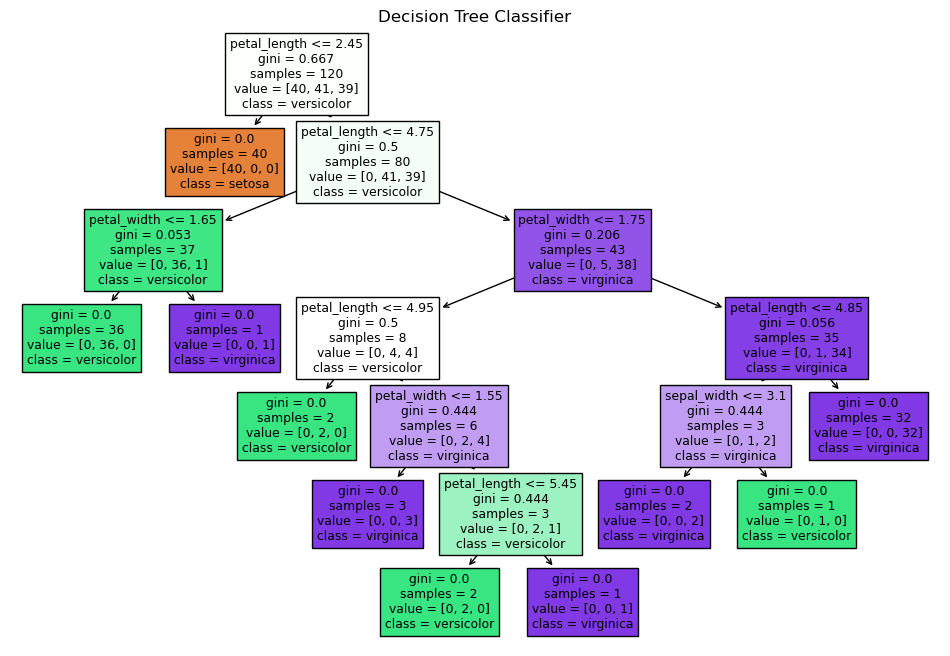

Accuracy (Before Pruning): 1.00
F1-Score (Before Pruning): 1.00


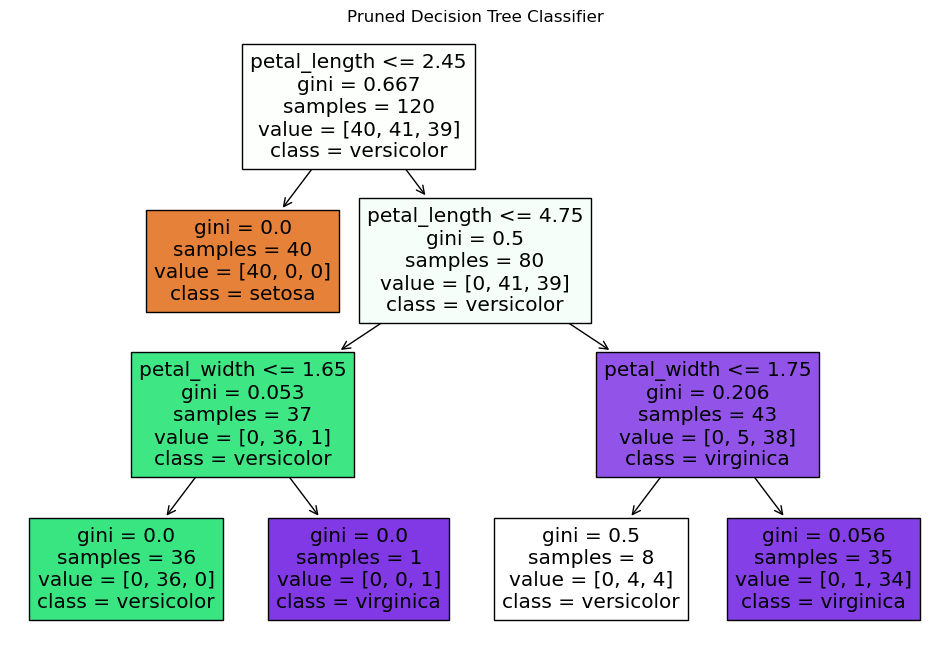

Accuracy (After Pruning): 1.00
F1-Score (After Pruning): 1.00


In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

iris_data = pd.read_csv('iris.csv')

label_encoder = LabelEncoder()
iris_data['species_encoded'] = label_encoder.fit_transform(iris_data['species'])


X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['species_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy (Before Pruning): {accuracy:.2f}")
print(f"F1-Score (Before Pruning): {f1:.2f}")


pruned_dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_dt_classifier.fit(X_train, y_train)


plt.figure(figsize=(12, 8))
plot_tree(pruned_dt_classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Pruned Decision Tree Classifier")
plt.show()


y_pruned_pred = pruned_dt_classifier.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
pruned_f1 = f1_score(y_test, y_pruned_pred, average='weighted')

print(f"Accuracy (After Pruning): {pruned_accuracy:.2f}")
print(f"F1-Score (After Pruning): {pruned_f1:.2f}")
